In [1]:
words = open("data/lastname.txt").read().splitlines()

In [2]:
words[:10]

['mollel',
 'mainoya',
 'mosses',
 'mallya',
 'moses',
 'kiveyani',
 'samwel',
 'kisunte',
 'gaston',
 'kasiko']

In [5]:
len(words)

25189

In [6]:
min(len(w) for w in words)

1

In [7]:
max(len(w) for w in words)

17

In [8]:
max(words, key=len)

'wilfredmlyapatali'

In [9]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1
       


In [10]:
sorted_bihs = sorted(b.items(), key=lambda x: -x[1])

In [13]:
import torch

In [14]:
N = torch.zeros((29,29), dtype=torch.int32)


In [15]:
chars = sorted(list((set(''.join(words)))))
stoi = {ch: i + 1 for i, ch in enumerate(chars)}
stoi["."] = 0
itos = {i: ch for ch, i in stoi.items()}


In [16]:
itos

{1: "'",
 2: '-',
 3: 'a',
 4: 'b',
 5: 'c',
 6: 'd',
 7: 'e',
 8: 'f',
 9: 'g',
 10: 'h',
 11: 'i',
 12: 'j',
 13: 'k',
 14: 'l',
 15: 'm',
 16: 'n',
 17: 'o',
 18: 'p',
 19: 'q',
 20: 'r',
 21: 's',
 22: 't',
 23: 'u',
 24: 'v',
 25: 'w',
 26: 'x',
 27: 'y',
 28: 'z',
 0: '.'}

In [17]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 #because everything starts at zero

(-0.5, 28.5, 28.5, -0.5)

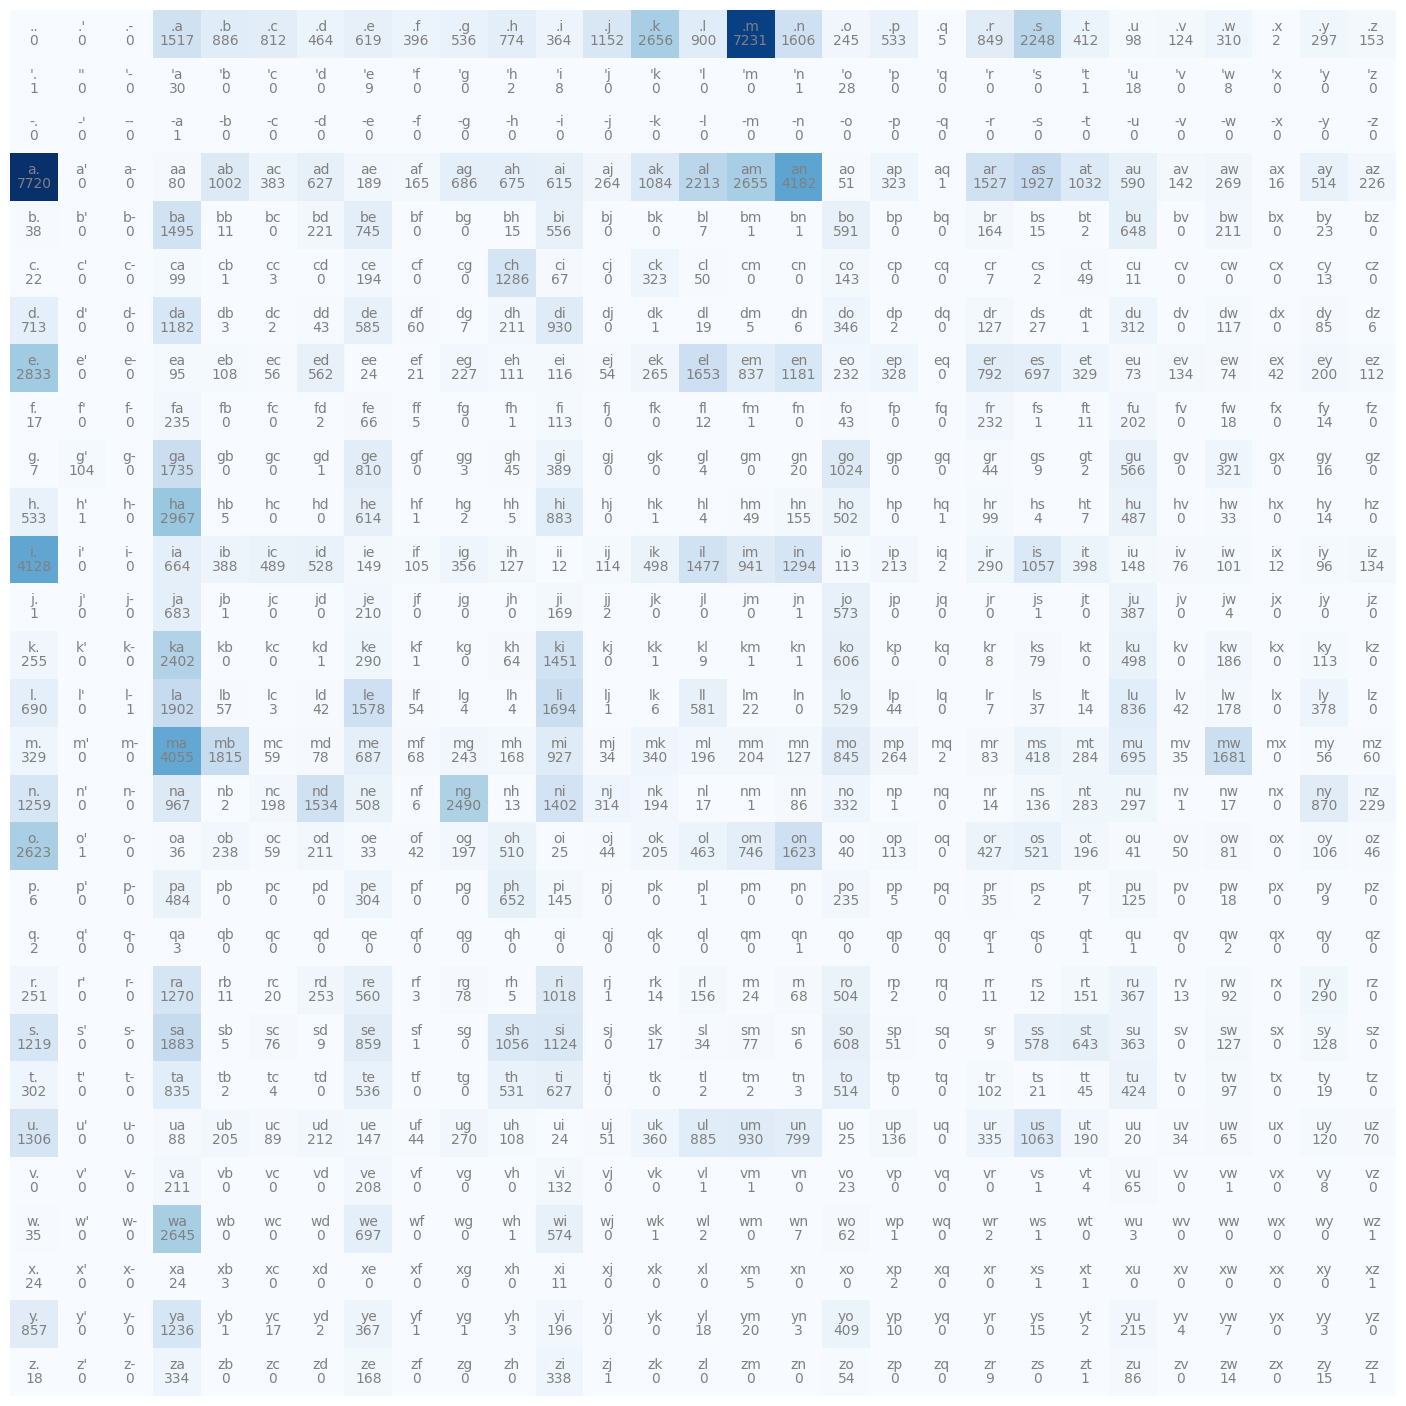

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')

In [19]:
N[0, :]

tensor([   0,    0,    0, 1517,  886,  812,  464,  619,  396,  536,  774,  364,
        1152, 2656,  900, 7231, 1606,  245,  533,    5,  849, 2248,  412,   98,
         124,  310,    2,  297,  153], dtype=torch.int32)

In [20]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0225e-02, 3.5174e-02, 3.2236e-02,
        1.8421e-02, 2.4574e-02, 1.5721e-02, 2.1279e-02, 3.0728e-02, 1.4451e-02,
        4.5734e-02, 1.0544e-01, 3.5730e-02, 2.8707e-01, 6.3758e-02, 9.7265e-03,
        2.1160e-02, 1.9850e-04, 3.3705e-02, 8.9245e-02, 1.6356e-02, 3.8906e-03,
        4.9228e-03, 1.2307e-02, 7.9400e-05, 1.1791e-02, 6.0741e-03])

In [21]:
p.sum()

tensor(1.0000)

In [22]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'a'

In [23]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [24]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [25]:
p.shape

torch.Size([3])

In [43]:
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)


In [44]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
   
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break
    print(''.join(out))

amwa.
mwasizulal.
sallel.
anamhang'ayo.
kamlishanga.


In [45]:
# model eval
lgo_likelihood = 0.0
n = 0
for w in ["nginilax"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        lgo_likelihood += logprob
        
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{lgo_likelihood=}')
nll = -lgo_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

.n: 0.0637 -2.7532
ng: 0.2224 -1.5032
gi: 0.0760 -2.5765
in: 0.0929 -2.3762
ni: 0.1253 -2.0773
il: 0.1060 -2.2440
la: 0.2179 -1.5237
ax: 0.0006 -7.4483
x.: 0.2475 -1.3962
lgo_likelihood=tensor(-23.8986)
nll=tensor(23.8986)
nll/n=tensor(2.6554)
